# Parametric vs Non-Parametric Lab

## Menu Change - Customer Satisfaction Analysis

As a junior data analyst at a consumer research firm, you've been tasked with analyzing customer feedback data from a major restaurant chain's menu redesign initiative. The restaurant has implemented new menu items in select locations and needs to understand their impact.

You'll be working with two key datasets:
1. Customer satisfaction ratings (1-5 scale) before and after the menu change
2. Customer return visit data comparing locations with and without the new menu

Using our four-step process, you'll need to determine whether the menu changes have made a significant impact on customer satisfaction and return rates, at an alpha of 0.05.
- Assessment
- Selection
- Implementation
- Interpretation

## Data Overview

Data Files: ratings.csv & return_visits.csv

Ratings Columns:
- customer_id: unique identifier
- before: rating before change
- after: rating after change

Return Visits Columns:
- customer_id: unique identifier
- location: New Menu or Old Menu
- returned: binary - if customer returned


First, let's import the libraries you'll need for our analysis and also load in the data


In [1]:
# CodeGrade step0
# Import Required Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load in both datasets - you will need to have downloaded provided files and placed in same location
df_ratings = pd.read_csv('ratings.csv')
df_return = pd.read_csv('return_visits.csv')

### Part 1: Assessment Phase

The Assessment Phase is crucial for understanding your data before jumping into analysis. Think of it as getting to know
your data's personality. During this phase, you'll:
- Examine how your data is distributed (Are satisfaction scores clustered around certain values?)
- Check your sample sizes (Do you have enough data to make reliable conclusions?)
- Look for unusual patterns or outliers (Are there any suspicious ratings that might skew your results?)
- Create visualizations to better understand your data
- Check data against your assumptions

This foundational work will help you make informed decisions about which statistical tests to use later.

### Ratings Data

In [2]:
# CodeGrade step1
# Describe the basic stats of the ratings data
ratings_describe = df_ratings.describe()
sample_size_ratings = df_ratings.shape[0]

In [3]:
# Run this cell without changes to display results
print(ratings_describe)
print(f"There are a total of {sample_size_ratings} customers in the paired ratings data, each with a score before the menu change and after")

       customer_id     before      after
count    75.000000  75.000000  75.000000
mean     37.000000   2.973333   3.453333
std      21.794495   1.229956   1.130574
min       0.000000   1.000000   1.000000
25%      18.500000   2.000000   3.000000
50%      37.000000   3.000000   4.000000
75%      55.500000   4.000000   4.000000
max      74.000000   5.000000   5.000000
There are a total of 75 customers in the paired ratings data, each with a score before the menu change and after


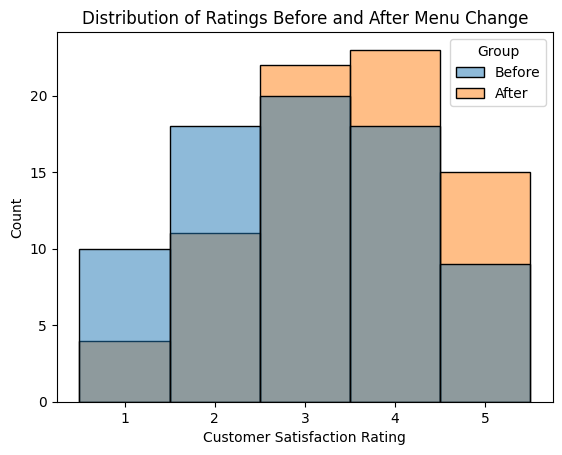

In [4]:
# CodeGrade step2
# Create a histogram to visually represent before and after rating
# Create pandas series
ratings_before = df_ratings['before']
ratings_after = df_ratings['after']
ratings_both = [ratings_before, ratings_after]

df_combined = pd.DataFrame({
    'Rating': pd.concat(ratings_both, ignore_index=True),
    'Group': ['Before'] * len(ratings_before) + ['After'] * len(ratings_after)
})

# Seaborn histplot - set these parameter values (discrete=True, multiple='layer')
hist_ratings = sns.histplot(data = df_combined, x='Rating', hue='Group', bins=5, discrete=True, multiple='layer')

# Labels
plt.xlabel('Customer Satisfaction Rating')
plt.title('Distribution of Ratings Before and After Menu Change')
plt.show()

### Return Visits Data

In [5]:
# CodeGrade step3
# Describe the basic stats of the location column
return_describe = df_return.describe()

# Seperate out New Menu and Old Menu samples - use pandas to create two dataframes
new_menu = df_return[df_return['location'] == 'New Menu']
old_menu = df_return[df_return['location'] == 'Old Menu']

# Counts for returned or not (binary column) - use built-in pandas method - return percentage (normalize=True)
new_return_counts = new_menu['returned'].value_counts(normalize=True)
old_return_counts = old_menu['returned'].value_counts(normalize=True)

In [6]:
# Run this cell without changes to display results
print(return_describe)
print(new_return_counts, old_return_counts)

       customer_id    returned
count   150.000000  150.000000
mean     74.500000    0.613333
std      43.445368    0.488618
min       0.000000    0.000000
25%      37.250000    0.000000
50%      74.500000    1.000000
75%     111.750000    1.000000
max     149.000000    1.000000
returned
1    0.746667
0    0.253333
Name: proportion, dtype: float64 returned
0    0.52
1    0.48
Name: proportion, dtype: float64


Text(0, 0.5, 'Return Rates')

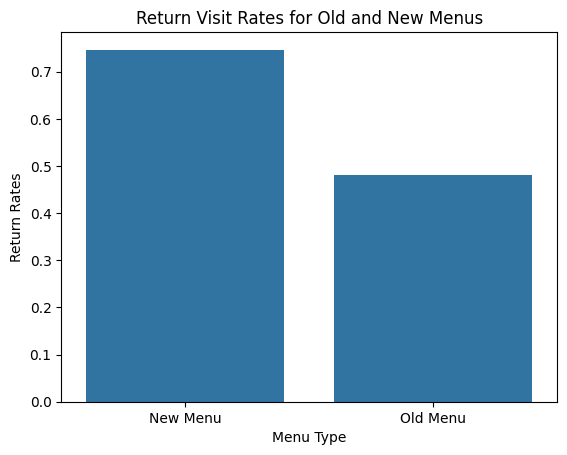

In [7]:
# CodeGrade step4
# Calculate return visits rates - you can use counts object above
new_return_rate = new_return_counts[1]
old_return_rate = old_return_counts[1]

# Barplot showing return visit rates comparing new and old menu
bar_return = sns.barplot(y=[new_return_rate, old_return_rate], x=['New Menu', 'Old Menu'])

# Labels
plt.title('Return Visit Rates for Old and New Menus')
plt.xlabel('Menu Type')
plt.ylabel('Return Rates')

### Assumption Checking
**For the Ratings Data (Before vs After):**

- We have paired measurements from the same customers before and after the menu change

Key assumption to check:
- Normality of differences (using Shapiro-Wilk Test)
- Equal Variances Between Samples (using Levene Test)

**For the Return Visits Data:**

This is a between-groups design comparing return rate between two independent groups (New Menu vs Old Menu)

Key assumptions checked for Chi-square test:
- Independent observations (we can assume this given different locations)
- Minimum expected frequencies - use [scipy.stats.contingency.expected_freq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq)

In [8]:
# CodeGrade step5
# Ratings Data (Before vs After)
# Calculate differences
differences = df_ratings['after'] - df_ratings['before']

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(differences)

# Levene test for equal variance - will tell us if distribution changed after menu change
levene_stat, levene_p = stats.levene(df_ratings['before'], df_ratings['after'])

# Return Visits Data
# Create contingency table
contingency = pd.crosstab(df_return['location'], df_return['returned'])
expected_freq = stats.chi2_contingency(contingency)

In [9]:
# Run this cell without changes to display results
print("Checking normality of differences (Shapiro-Wilk test):")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print("Levene's test for homogeneity of variances:")
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")
print("\nContingency table for return visits:")
print(contingency)
print(expected_freq)

Checking normality of differences (Shapiro-Wilk test):
Statistic: 0.9560, p-value: 0.0109
Levene's test for homogeneity of variances:
Statistic: 0.1000, p-value: 0.7522

Contingency table for return visits:
returned   0   1
location        
New Menu  19  56
Old Menu  39  36
Chi2ContingencyResult(statistic=np.float64(10.148050974512744), pvalue=np.float64(0.0014445388752895672), dof=1, expected_freq=array([[29., 46.],
       [29., 46.]]))


### Part 2: Selection Phase

Now that you understand your data, it's time to choose appropriate statistical tests. This phase is like selecting the
right tool for the job. Your choice will depend on:
- The distribution and type of your data (normal vs non-normal)
- The type of comparison you're making (before/after, between groups)
- The general assumptions you can reasonably make about your data
- The statistical test assumptions you checked

Select the appropriate statistical test for each analysis based on the information above. Choose from one of the options below - make sure to match the correct string name when you assign to variable.
- Paried t-test
- 2 Sample Independent t-test
- Goodness of Fit test
- Test of Independence
- Test of Homogeneity
- Fisher's Exact test
- Mann-Whitney U test
- Wilcoxon signed-rank test

In [13]:
# CodeGrade step6
# Document your chosen tests

# For ratings analysis, even though the test statistic was 0.956, which is close
# to 1, which indicates the data more closely follows a normal distribution,
# a Wilcoxon signed-rank test should be used because the p-value was 0.0109
# which is less than the alpha of 0.05. Therefore we reject the null hypothesis
# that the data is normally distributed, and conclude that the data is likely not
# normally distributed.

# According to the Levene test, the p-value is 0.7522 which is greater than alpha
#  = 0.05, which means we fail toreject the null hypothesis and conclude that
# there is no statistical difference in variances. So we must conclude that the
# before and after variances are equal.

# We must assume that the data is independent, that the customers are not
# conferring amongst each other about the ratings they give before and after
# about the new and old menu.

# for level of measurement, parametric tests assume interval or ratio level data.
# however, we have ordinal data here, where customers are giving ratings on a scale
# of 1-5. This is a reason to not use a parametric test.

# We checked for normality and homoscedasticity. The data has similar variances
# according to the Levene test, but failed the normality test. So we should not
# move forward with a parametric test, but instead use nonparametric, this case
# the Wilcoxon because it is used for paired samples which in this case it is
# because we're dealing with before and after ratings.

# Name of chosen test for ratings analysis - as a string
selected_test_ratings = 'Wilcoxon signed-rank test'

# For the return visits analysis, we are looking at the relationship between two
# variables, menu type (old, new) and return visit (yes, no), for a single population
# of the customers. Therefore a chi squared test of independence is chosen.
# Since the p-value is 0.0014 which is below alpha = 0.05, we reject the null
# hypothesis that there is no relation between the two variables menu type
# and return visit. We conclude that there is a statistically significant
# relationship between the two variables. customers who saw the new menu tend
# to return more frequently than those who saw the old menu

# Name of chosen test for return visits analysis - as a string
selected_test_returns = 'Test of Independence'

### Part 3: Implementation Phase

This is where you put your plan into action. You'll implement your chosen statistical tests, create clear visualizations of your results, and calculate effect sizes to understand the practical significance of any differences you find.

### Statisical Tests

In [14]:
# CodeGrade step7
# Test 1: Comparing Before and After Ratings
# Using appropriate test
stat_ratings, p_value_ratings = stats.wilcoxon(df_ratings['before'], df_ratings['after'])

In [15]:
# Run this code without changes to display result
print("\nBefore and After Ratings test results:")
print(f"Statistic: {stat_ratings:.4f}, p-value: {p_value_ratings:.4f}")


Before and After Ratings test results:
Statistic: 642.0000, p-value: 0.0268


In [16]:
# CodeGrade step8
# Test 2: Comparing Return Visits Between Menu Types
# Using appropriate test
stat_return, p_value_return, _, _ = stats.chi2_contingency(contingency)

In [17]:
# Run this code without changes to display result
print("\nReturn Visits test results:")
print(f"Statistic: {stat_return:.4f}, p-value: {p_value_return:.4f}")


Return Visits test results:
Statistic: 10.1481, p-value: 0.0014


### Part 4: Interpretation Phase

### Effect Sizes

**For the Ratings Data:**

Calculate Cohen's d effect size for paired samples (before/after ratings).
    
For paired samples, we use the mean difference divided by the standard deviation of the differences, which accounts for the correlation between measurements.

**For the Return Visits Data:**

Calculate Cramer's V for categorical variables

Measures the strength of association between two categorical variables, in this case location (menu type) and customer return status, by calculating a value between 0 and 1, where 0 indicates no relationship and 1 indicates a perfect relationship, helping us understand whether the menu change had a meaningful impact on customer return behavior beyond just statistical significance.

Cramer's V for a 2x2 Contingency Table is calculated by dividing the Chi2 Statistic by the total sample size and then taking the square root.

In [19]:
# CodeGrade step9
# Calculates effect sizes for both analyses:
# Cohen's d for ratings (continuous, paired data)
differences = df_ratings['after'] - df_ratings['before']
ratings_effect_size = differences.mean() / differences.std(ddof=1)

# Cramer's V for return visits (binary categorical data)
# Total sample size
chi2_stat = 10.148
n = contingency.to_numpy().sum()
k = min(contingency.shape)
returns_effect_size = np.sqrt(chi2_stat / (n * (k - 1)))

In [20]:
# Run this cell to display the results
print(f"Effect size for paired ratings analysis: {ratings_effect_size}")
print(f"Effect size for the return visits analysis: {returns_effect_size}")

Effect size for paired ratings analysis: 0.2718406974151428
Effect size for the return visits analysis: 0.26010254388093423
